# Project Summary 

This project focused on understanding the sentiment of YouTube comments and the engagement metrics of YouTube videos across different categories. The project involves sentiment analysis, word cloud visualization, emoji usage analysis, and engagement rate comparisons. Here's a breakdown of each part of the analysis:

## Data Importing and Cleaning
YouTube comments are imported from a CSV file, and any rows with missing values are dropped.
An additional dataset from multiple CSV files in a directory is concatenated into a single DataFrame.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter
import plotly.graph_objects as go
import plotly.io as pio
import os
import warnings
from warnings import filterwarnings
from sqlalchemy import create_engine

In [2]:
# Load the comments dataset and drop rows with missing values.
comments = pd.read_csv('UScomments.csv', on_bad_lines='skip',low_memory=False)
comments.dropna(inplace=True)

## Sentiment Analysis
Using TextBlob, the polarity of each comment is determined, which signifies the sentiment (positive, negative, or neutral).

Comments are then filtered into positive and negative groups based on their polarity.

For both positive and negative comments, word clouds are generated to visually represent the frequency of word occurrences.

In [3]:
# Perform sentiment analysis on comment text.
polarity = [TextBlob(comment).sentiment.polarity if comment else 0 for comment in comments['comment_text']]
comments['polarity'] = polarity

In [4]:
# Filter comments based on polarity for positive and negative sentiments.
comments_positive = comments[comments['polarity'] == 1]
comments_negative = comments[comments['polarity'] == -1]

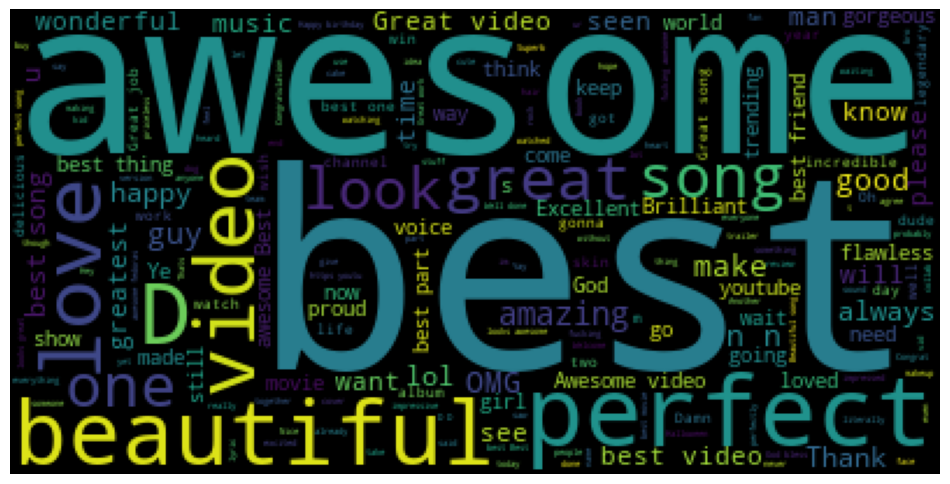

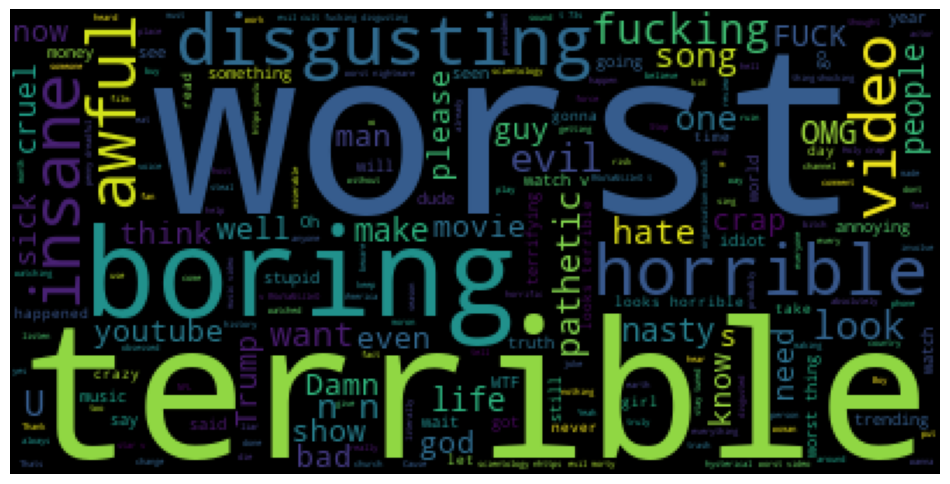

In [5]:
# Generate and display word clouds for positive and negative comments.
plt.figure(figsize=(12, 8))
wordcloud_positive = WordCloud(stopwords=STOPWORDS).generate(' '.join(comments_positive['comment_text']))
plt.imshow(wordcloud_positive)
plt.axis('off')
plt.savefig('positive word cloud.png')
plt.show()

plt.figure(figsize=(12, 8))
wordcloud_negative = WordCloud(stopwords=STOPWORDS).generate(' '.join(comments_negative['comment_text']))
plt.imshow(wordcloud_negative)
plt.axis('off')
plt.show()

The first word cloud indicates overwhelmingly positive reception for a YouTube video or song, with frequent use of praise such as "awesome," "perfect," and "best." The prominence of these words suggests strong approval and enjoyment from viewers, which is as expected.

The second word cloud illustrates a predominantly negative sentiment from the collected feedback, with dominant terms such as "worst," "terrible," and "boring" indicating strong disapproval. This visualization captures the critical perspective of viewers, focusing on their dissatisfaction with aspects related to a "song," "video," or "music" content. 

## Emoji Analysis
Comments are scanned for emojis, and the frequencies of the emojis are calculated.
A bar chart is created to display the top 10 most common emojis used in the comments.

In [6]:
# Count and visualize the top 10 most used emojis in the comments.
all_emojis = ''.join(comment for comment in comments['comment_text'] if comment)
emoji_freq = Counter(char for char in all_emojis if char in emoji.EMOJI_DATA)
top_emojis = emoji_freq.most_common(10)

In [7]:
# Create a Bar Chart
trace = go.Bar(x=[item[0] for item in top_emojis], y=[item[1] for item in top_emojis])
fig = go.Figure([trace])

# Save the figure as an HTML file
fig.write_html("top_emojis_bar_chart.html")

![Bar Chart](emoji_bar_chart.png)

In the analysis of YouTube comments, I discovered that emojis are a prominent form of expression within the community. The top 10 most frequently used emojis and their respective counts are presented above.

These emojis are frequently used by YouTube users to convey various emotions, including humor, admiration, love, excitement, sadness, applause, affection, agreement, and support. 

Emojis serve as a powerful means of communication, allowing viewers to express their feelings and engage with content and other commenters in a visually expressive manner. 

By understanding the prevalence and meaning of these emojis, we'll gain valuable insights into the sentiments and interactions within the YouTube community.


## Category Analysis

A JSON file is parsed to create a dictionary mapping category IDs to names.
This dictionary is converted to a DataFrame and merged with the main DataFrame to label each video with its category name.


In [8]:
# Aggregating additional data from CSV files into a single DataFrame.
files_csv = [file for file in os.listdir('additional_data') if file.endswith('.csv')]
full_df = pd.concat([pd.read_csv(f'additional_data/{file}', encoding='iso-8859-1', on_bad_lines='skip') for file in files_csv]).drop_duplicates()

# Mapping category IDs to names using a JSON file.
json_df = pd.read_json('additional_data/US_category_id.json')
cat_dict = {int(item['id']): item['snippet']['title'] for item in json_df['items']}

# Merging category names into the full DataFrame based on category_id.
categories_df = pd.DataFrame(list(cat_dict.items()), columns=['category_id', 'category_name'])
full_df = full_df.merge(categories_df, on='category_id', how='left')

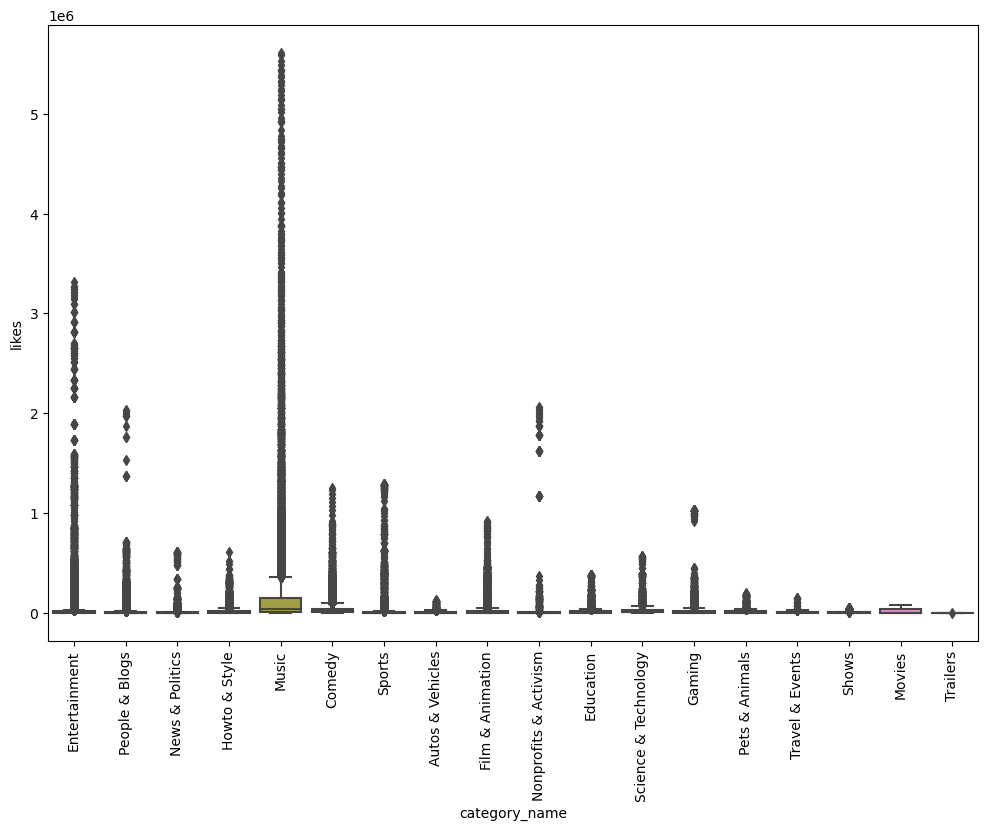

In [9]:
# Generate boxplot to compare likes across different categories.
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation='vertical')
plt.savefig('category_likes.png')
plt.show()

## Engagement Metrics Visualization

Boxplots are generated to compare the distribution of likes across different categories.
Additional metrics like the rate of likes, dislikes, and comments relative to the number of views are calculated and visualized using boxplots and regression plots.
A heatmap is created to show the correlation between views, likes, and dislikes.

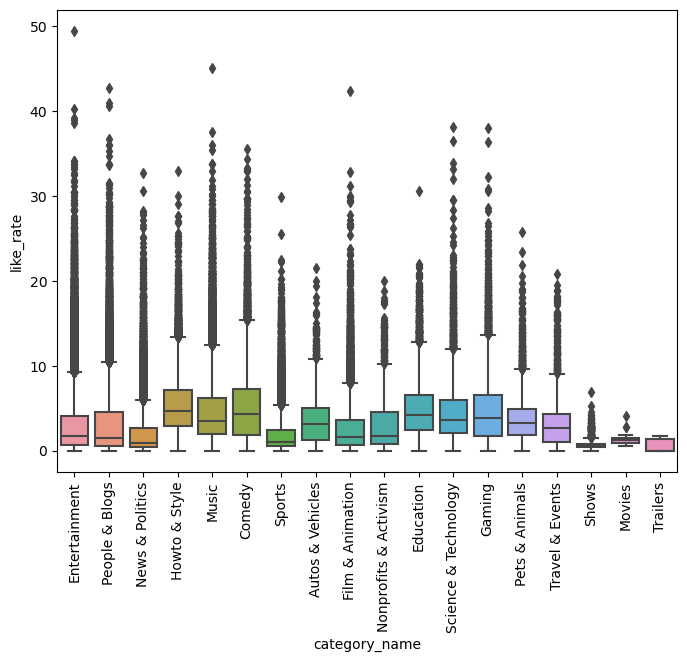

In [10]:
# Calculate and visualize the like, dislike, and comment rates.
full_df['like_rate'] = (full_df['likes'] / full_df['views']) * 100
full_df['dislike_rate'] = (full_df['dislikes'] / full_df['views']) * 100
full_df['comment_count_rate'] = (full_df['comment_count'] / full_df['views']) * 100

plt.figure(figsize=(8,6))
sns.boxplot(x='category_name', y='like_rate', data=full_df)
plt.xticks(rotation='vertical')
plt.savefig('category_like_rate.png')
plt.show()

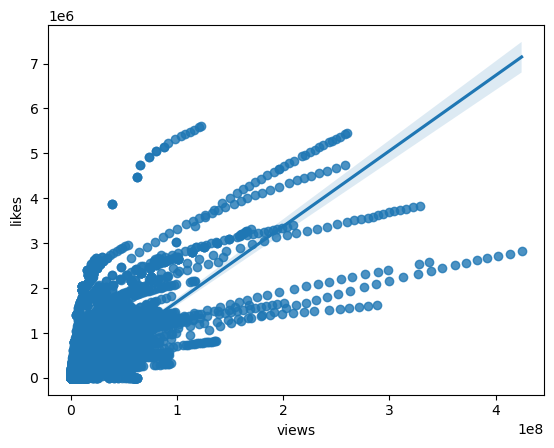

In [11]:
# Create a scatter plot to analyze the relationship between views and likes.
ax = sns.regplot(x='views', y='likes', data=full_df)

# Get the figure object from the Axes object
fig = ax.get_figure()

# Save the figure
fig.savefig('regplot_views_likes.png')

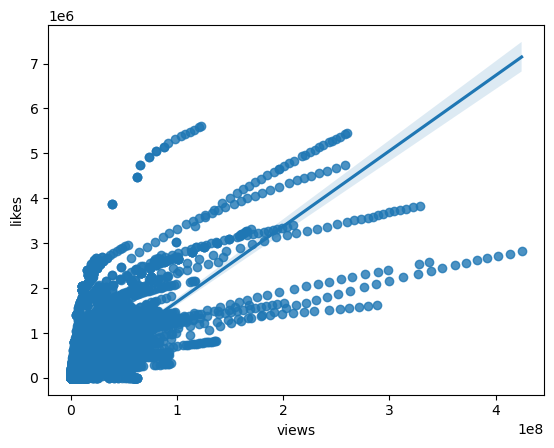

In [12]:
# Create a scatter plot to analyze the relationship between views and likes.
ax = sns.regplot(x='views', y='likes', data=full_df)

# Get the figure object from the Axes object
fig = ax.get_figure()

# Save the figure
fig.savefig('regplot_views_likes.png')

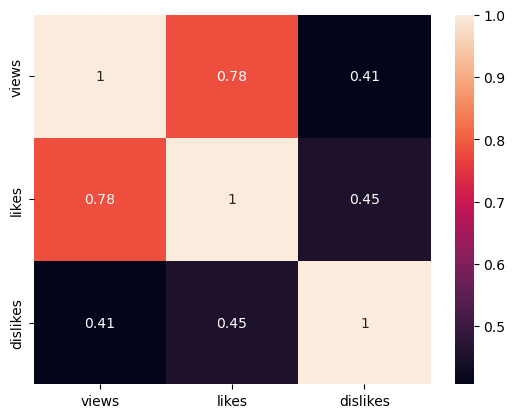

In [13]:
# Display a heatmap to show correlations between views, likes, and dislikes.
ax = sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot=True)
fig = ax.get_figure()
fig.savefig('heatmap.png')

## Conclusion

- Sentiment analysis revealed distinct word usage patterns in positive and negative comments, as visualized in the word clouds.
- Emoji analysis highlighted the most prevalent emojis, indicating a trend in viewer expression.
- Category analysis showed variations in engagement metrics across different YouTube categories, suggesting that viewer interaction varies significantly by content type.
- The correlation heatmap provided insights into the relationship between views, likes, and dislikes, indicating potential factors that drive engagement on YouTube.